In [11]:
import yfinance as yf

# Fetch Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")  # Last 1 year

# Reset the index
tesla_data.reset_index(inplace=True)

# Save the DataFrame (optional)
tesla_data.to_csv("tesla_stock_data.csv", index=False)

# Display the first five rows
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-20 00:00:00-04:00,267.040009,273.929993,262.459991,262.589996,122514600,0.0,0.0
1,2023-09-21 00:00:00-04:00,257.850006,260.859985,254.210007,255.699997,119531000,0.0,0.0
2,2023-09-22 00:00:00-04:00,257.399994,257.790009,244.479996,244.880005,127524100,0.0,0.0
3,2023-09-25 00:00:00-04:00,243.380005,247.100006,238.309998,246.990005,104636600,0.0,0.0
4,2023-09-26 00:00:00-04:00,242.979996,249.550003,241.660004,244.119995,101993600,0.0,0.0


In [16]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL for Tesla's revenue data (replace with the correct URL)
url = 'https://www.example.com/tesla-revenue-data'  # Update this URL

# Make a request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')

    # Assuming the revenue data is in a table
    table = soup.find('table')  # Find the first table on the page

    # Extract headers
    headers = [header.text for header in table.find_all('th')]

    # Extract rows
    rows = []
    for row in table.find_all('tr')[1:]:  # Skip header row
        cells = row.find_all('td')
        rows.append([cell.text for cell in cells])

    # Create a DataFrame
    tesla_revenue = pd.DataFrame(rows, columns=headers)

    # Display the last five rows
    print(tesla_revenue.tail())
else:
    print(f"Failed to retrieve data: {response.status_code}")


Failed to retrieve data: 404


In [3]:
# Fetch GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="1y")  # Last 1 year

# Reset the index
gme_data.reset_index(inplace=True)

# Save the DataFrame (optional)
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2023-09-20 00:00:00-04:00,17.629999,17.930000,17.450001,17.520000,2129800,0.0,0.0
1,2023-09-21 00:00:00-04:00,17.280001,17.320000,16.650000,17.020000,2910700,0.0,0.0
2,2023-09-22 00:00:00-04:00,17.180000,17.350000,17.000000,17.180000,2100300,0.0,0.0
3,2023-09-25 00:00:00-04:00,17.000000,17.719999,16.850000,17.670000,2181200,0.0,0.0
4,2023-09-26 00:00:00-04:00,17.379999,17.820000,16.780001,16.780001,2726800,0.0,0.0


In [15]:
# URL for GameStop revenue data
url = "https://www.example.com/gamestop-revenue"  # Replace with actual URL
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Extract revenue data (modify as per the actual HTML structure)
revenue_data = []
for row in soup.find_all('tr'):  # Adjust the selector as necessary
    cols = row.find_all('td')
    if cols:
        revenue_data.append([col.text for col in cols])

# Create a DataFrame
gme_revenue = pd.DataFrame(revenue_data, columns=['Year', 'Revenue'])

# Display the last five rows
gme_revenue.tail()


,Year,Revenue


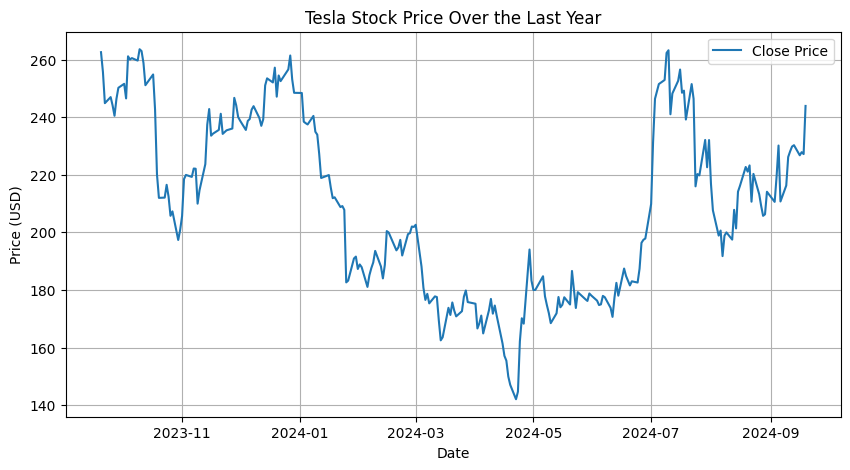

In [5]:
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10,5))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid()
    plt.show()

make_graph(tesla_data, "Tesla Stock Price Over the Last Year")


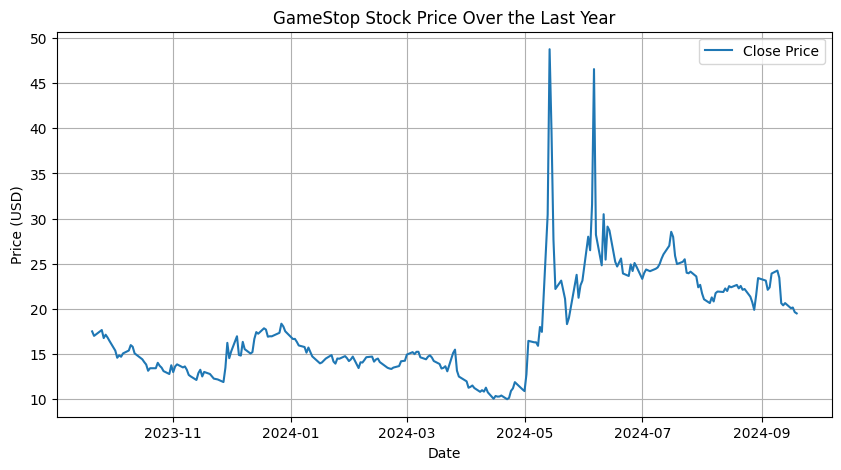

In [6]:
make_graph(gme_data, "GameStop Stock Price Over the Last Year")
